In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def load_datasets(img_size=(28, 28)):
    # Define the path to the folder containing the subfolders of flower species
    data_dir = 'flowers'
    flower_species = os.listdir(data_dir)

    # Create empty lists for images and labels
    images = []
    labels = []

    # Loop through each subfolder to read images and assign labels
    for species in flower_species:
        species_dir = os.path.join(data_dir, species)
        for img_file in os.listdir(species_dir):
            img_path = os.path.join(species_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  # Resize the image to a fixed size
            images.append(img)
            labels.append(species)

    # Convert images and labels into numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [2]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Load the datasets
X_train, X_test, y_train, y_test = load_datasets()

# Convert the labels to numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convert the labels to one-hot encoded vectors
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes=num_classes).T
y_test = to_categorical(y_test, num_classes=num_classes).T

In [3]:
X_train = X_train.reshape((X_train.shape[0], -1)).T
X_test=X_test.reshape((X_test.shape[0],-1)).T
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2352, 3309)
(2352, 828)
(5, 3309)
(5, 828)


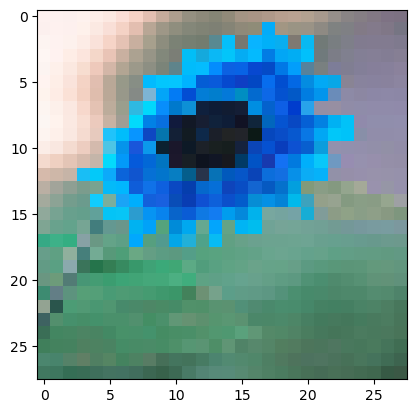

In [4]:
import random
import matplotlib.pyplot as plt
index=random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:,index].reshape(28,28,3),cmap='gray')
plt.show()

In [5]:
def tanh(Z):
    return np.tanh(Z)
def relu(Z):
    return np.maximum(Z,0)
def softmax(Z):
    exp=np.exp(Z)
    return exp/np.sum(exp,axis=0)

In [6]:
def tanh_backward(Z):
    return (1-np.power(Z,2))
def relu_backward(Z):
    return np.array(Z>0,dtype=np.float32)

In [ ]:
def init_w_b(layers):
    w1=np.random.randn(layers[1],layers[0])*0.01
    b1=np.zeros((layers[1],1))
    w2=np.random.randn(layers[2],layers[1])*0.01
    b2=np.zeros((layers[2],1))
    w_b={
        'W1':w1,'b1':b1,'W2':w2,'b2':b2
    }
    return w_b

In [ ]:
def forward_prop(X,w_b):
    W1=w_b['W1']
    b1=w_b['b1']
    W2=w_b['W2']
    b2=w_b['b2']
    
    Z1=np.dot(W1,X)+b1
    a1=relu(Z1)
    Z2=np.dot(W2,a1)+b2
    a2=softmax(Z2)
    cache={
        'Z1':Z1,'a1':a1,'Z2':Z2,'a2':a2
    }
        
    return cache

In [ ]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    epsilon = 1e-8
    cost = -(1/m)*np.sum(np.multiply(Y, np.log(AL+epsilon)) + np.multiply(1-Y, np.log(1-AL+epsilon)))
    cost = np.squeeze(cost)
    return cost

In [ ]:
def back_prop(X,y,w_b,cache):
    W1=w_b['W1']
    b1=w_b['b1']
    W2=w_b['W2']
    b1=w_b['b2']
    
    a1=cache['a1']
    a2=cache['a2']
    
    m=X.shape[1]
    dZ2=(a2-y)
    dW2=(1/m)*np.dot(dZ2,a1.T)
    db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
    
    dZ1=(1/m)*np.dot(W2.T,dZ2)*relu_backward(a1)
    dW1=(1/m)*np.dot(dZ1,X.T)
    db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads={
        'dW1':dW1,'db1':db1,'dW2':dW2,'db2':db2
    }
    return grads

In [ ]:
def update_w_b(w_b,grads,alpha):
    w1=w_b['W1']
    b1=w_b['b1']
    w2=w_b['W2']
    b2=w_b['b2']
    
    dw1=grads['dW1']
    db1=grads['db1']
    dw2=grads['dW2']
    db2=grads['db2']
    
    w1-=(dw1*alpha)
    b1-=(db1*alpha)
    w2-=(dw2*alpha)
    b2-=(db2*alpha)
    
    w_b={
        'W1':w1,'b1':b1,'W2':w2,'b2':b2
    }
    return w_b
    

In [ ]:
def model(X,y,alpha,iters,layer):
    costt=[]
    w_b=init_w_b(layer)
    for i in range(iters):
        cache=forward_prop(X,w_b)
        cost=compute_cost(cache['a2'],y)
        grads=back_prop(X,y,w_b,cache)
        w_b=update_w_b(w_b,grads,alpha)
        costt.append(cost)
        if(i%(iters/10)==0):
            print('Cost after',i,'iters is: ',cost)
    return w_b,costt

In [51]:
layer=[X_train.shape[0],300,y_train.shape[0]]
params,costt=model(X_train,y_train,0.001,500,layer)

Cost after 0 iters is:  8.734606336787417
Cost after 50 iters is:  18.235628684608734
Cost after 100 iters is:  24.927362221645446
Cost after 150 iters is:  17.170776202516375
Cost after 200 iters is:  15.419974521657043
Cost after 250 iters is:  14.166489676189464
Cost after 300 iters is:  17.986038869973783
Cost after 350 iters is:  16.54851928876232
Cost after 400 iters is:  16.98700722780536
Cost after 450 iters is:  14.546574082369293


In [ ]:
t=np.arange(0,5000)
plt.plot(t,costt)
plt.show()

In [ ]:
forr=forward_prop(X_train,params)
a_out=forr['a2']
a_out=np.argmax(a_out,0)
y_out=np.argmax(y_train,0)
a_out==y_out
acc=np.mean(a_out==y_out)*100
print(acc)